

# Traffic tracking with rotational ground motions
### Back azimuth estimation using vertical translational and two horizontal rotational ground motions
*Developed by Shihao Yuan (Colorado School of Mines)*


<img src="coord.jpg" alt="drawing" width="300"/>
Figure 1. The right-hand coordinate system. Red arrow indicates the propagation direction of the plane wave with a polar angle ($\theta$) and azimuth ($\varphi$). Clockwise rotations from North or Z are positive while counterclockwise rotations are negative.



### For incident Rayleigh waves:

\begin{align} 
	\mathbf{s} =  \frac{1}{v}
	\begin{bmatrix}
	\sin \varphi \\
	\cos \varphi  \\
	0 \\
	\end{bmatrix},   \quad \quad     
	\mathbf{n} = 
	\begin{bmatrix}
	\sin \xi \sin \varphi \\
	\sin \xi \cos \varphi \\
	\cos \xi \\
	\end{bmatrix}, \quad \quad 
	\mathbf{s} \times \mathbf{n} =  \frac{1}{v} 
	\begin{bmatrix}
	 \cos \xi \cos \varphi  \\
	-\cos \xi \sin \varphi \\
	  0  \\[20pt]
	\end{bmatrix} , 
\end{align}

where the angle $\xi$ denotes ellipticity angle of the Rayleigh wave, determining the eccentricity and the sense of rotation of the particle motion. If $\xi \in (−\pi/2, 0)$, the Rayleigh wave elliptical motion is said to be retrograde. If $\xi \in (0, \pi/2)$ the wave is said to be prograde.


\begin{align}
	\text{Acceleration: } \mathbf{\ddot{u}} =   - \omega^2 A
	& 	\begin{bmatrix}
	\sin \xi \sin \varphi &\cos [ \omega (t - \mathbf{s} \cdot \mathbf{r}) + \phi ] \\
	\sin \xi \cos \varphi &\cos [ \omega (t - \mathbf{s} \cdot \mathbf{r}) + \phi ] \\
	\cos \xi  &\cos [ \omega (t - \mathbf{s} \cdot \mathbf{r}) + \phi + \pi/2] \\
	\end{bmatrix} , \\[10pt]
	\text{Rotational rate: } \mathbf{\dot{R}} =  A \frac{\omega^2}{v}
	& \begin{bmatrix}	
	 \cos \xi \cos \varphi  \\
	-\cos \xi \sin \varphi \\
	  0 \\ 
	\end{bmatrix} \cos [ \omega (t - \mathbf{s} \cdot \mathbf{r}) + \phi + \pi/2], 
\end{align}

where the vertical component acceleration has a $\pi/2$ phase shift compared to the horizontal components, causing elliptical particle motions. 

+ The same as SV waves, using two horizontal rotational components to estimate $\varphi$:

\begin{equation*}
    \varphi = - \arctan (\frac{\dot{R}_n}{\dot{R}_e})
\end{equation*}

The calculated $\varphi$ value from the inverse tangent ranges from $-90^\circ$ to $90^\circ$. We then convert it to the value between $0^\circ$ and $180^\circ$ by 

\begin{equation*}
\varphi = 
\begin{cases} \varphi, & \text{if } \varphi \geq 0 \\ \varphi + 180^\circ, & \mbox{if } \varphi < 0  \end{cases}.
\end{equation*}

Thus, the back azimuth $\varphi_{baz}$ (<font color='red'>with $180^\circ$ ambiguity</font>) is equal to

\begin{equation*}
\varphi_{baz} = \varphi \qquad   \text{or}  \qquad \varphi + 180
\end{equation*}

+ Removing $180^\circ$ ambiguity:

We rotate the east-west ($R_e$) and north-south ($R_n$) rotational components to radial ($R_r$) and transverse ($R_t$) components:

\begin{align*}
\begin{bmatrix} \dot{R}_r  \\ \dot{R}_t  \end{bmatrix} 
= \begin{bmatrix} -\sin \varphi_{baz} & -\cos \varphi_{baz}  \\ -\cos \varphi_{baz} & \sin \varphi_{baz}  \end{bmatrix} \begin{bmatrix} \dot{R}_e  \\ \dot{R}_n  \end{bmatrix}
=  A \frac{\omega^2}{v} \begin{bmatrix} 0  \\ \cos \xi  \end{bmatrix} \cos [ \omega (t - \mathbf{s} \cdot \mathbf{r}) + \phi + \pi/2].
\end{align*}

To remove the $180^{\circ}$, we can compare the transverse rotational component to vertical translational component. 

\begin{equation*}
\begin{bmatrix} \ddot{u}_z  \\ \dot{R}_t  \end{bmatrix}
= -  A \omega^2 \cos \xi \begin{bmatrix}  1  \\ -\frac{1}{v}  \end{bmatrix} \cos [ \omega (t - \mathbf{s} \cdot \mathbf{r}) + \phi + \pi/2].
\end{equation*}

If the trial $\varphi_{baz}$ with $180^\circ$ ambiguity is equal to the theorectical one, $\ddot{u}_z$ and $\dot{R}_t$ will be negtively correlated. If $\ddot{u}_z$ and $\dot{R}_t$ are positively correlated, we need to add $180^{\circ}$ to $\varphi_{baz}$.

<figure>
  <IMG SRC="./sta_map.jpg" WIDTH=600 ALIGN="center">
</figure>
Figure 2. Map showing the study area and the location of chosen stations. Blue curve denotes the highway. 
    

<figure>
  <IMG SRC="./set-up.jpg" WIDTH=300 ALIGN="center">
</figure>
Figure 3. Station set-up using a Trillium Compact broadband seismometer (green) and an blueSeis-3A rotational seismometer (black)

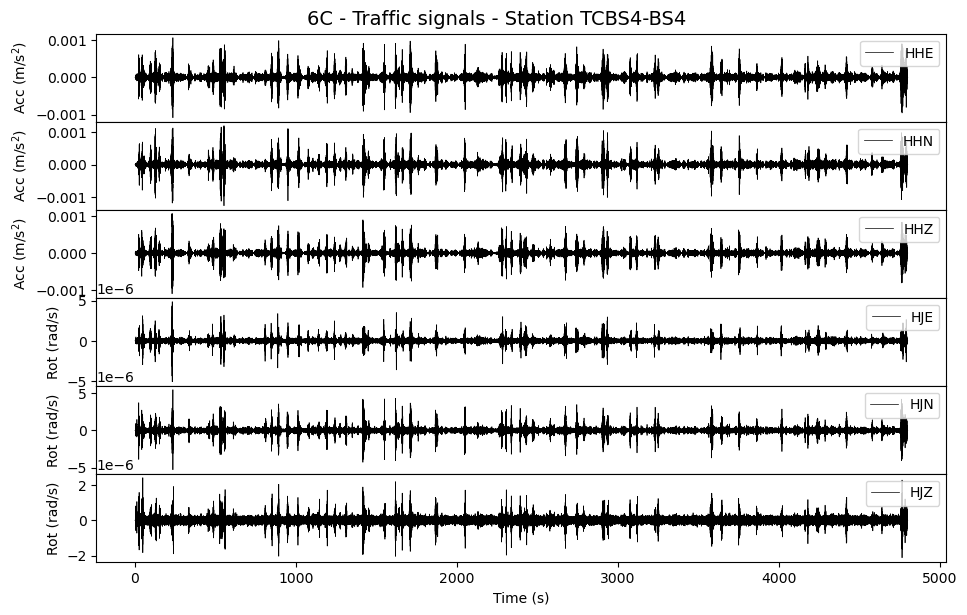

In [1]:
import matplotlib.pyplot as plt
from utils import BazAnalysis

BazAnalyzer = BazAnalysis(          
    "inventory.xml",                # inventory file
    "BS_cars.mseed",                # data file
    filter_freq=(3, 15),            # frequency range in Herz
    time_window=(0, 180),           # time window in second
    window_params=(1, 0.02),        # window parameters in second (window length, moving step)
    station_pairs=[                 # station pairs
        ('TCBS3', 'BS3'),
        ('TCBS4', 'BS4')
    ],
    cc_threshold=0.40               # correlation threshold for visualization
)

# Plot 6C seismogram
fig, axs = BazAnalyzer.plot_6c_seismogram(station='*BS4')
plt.show()

Processed station pair: TCBS3 - BS3
Processed station pair: TCBS4 - BS4


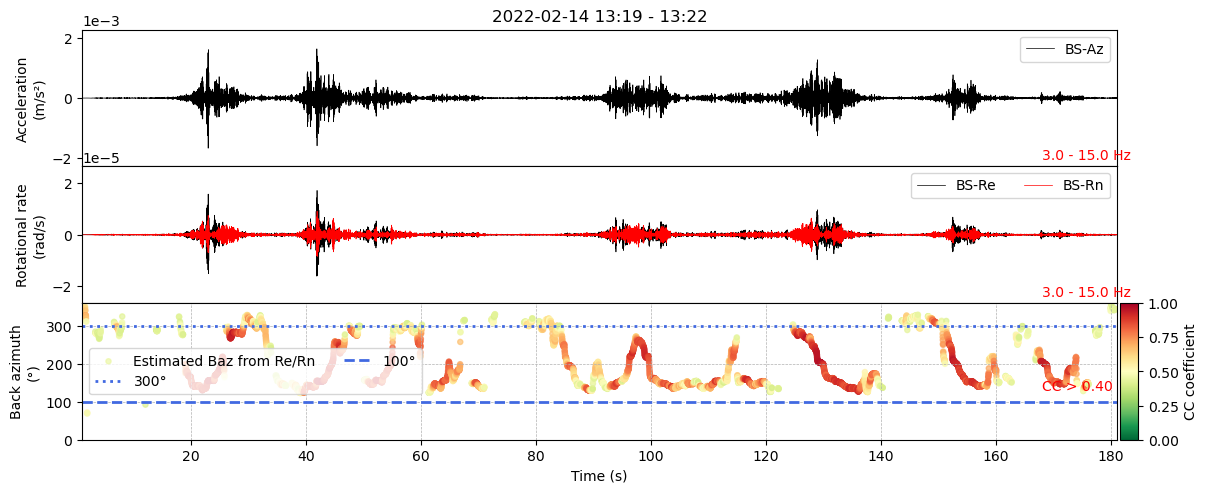

In [2]:
# Estimate back azimuth

BazAnalyzer.process_station_data()
BazAnalyzer.plot_results(station_idx=0)  # 0: TCBS3-BS3; 1: TCBS4-BS4 